# Import modules


In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
Planted trees in the metropole of grenoble.\
Source: [metropole grenoble](https://data.metropolegrenoble.fr/visualisation/information/?id=arbres-grenoble&disjunctive.sous_categorie_desc&disjunctive.espece&location=12,45.18821,5.74699)

In [136]:
df=pd.read_csv(
    'data/arbres_grenoble_epsg4326.csv',
    sep=',',
    index_col=0
)

In [137]:
df.head()

,code,nom,genre,genre_desc,categorie,categorie_desc,sous_categorie,sous_categorie_desc,code_parent,code_parent_desc,...,diametrearbre,causeabattage,collectivite,stationmetro,hauteurarbre,portarbre,structure,forme,typenature,geo_point_2d
elem_point_id,,,,,,,,,,,,,,,,,,,,,
34835,ESP36318,AR36318,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.167098421885385,5.740131798404362"
34836,ESP36319,AR36319,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.16710682038838,5.740199792549315"
34837,ESP36320,AR36320,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.167115270975415,5.740265608803635"
34838,ESP36321,AR36321,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.16712715617142,5.740349032579623"
34839,ESP36322,AR36322,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.167144245872265,5.740471081600832"


# Clean Columns
## Full of na

In [138]:
#I drop columns that are full of na
df.dropna(axis=1,how='all',inplace=True)
#I drop lines that are full of na
df.dropna(axis=0,how='all',inplace=True)
df.columns.values

array(['code', 'nom', 'genre', 'genre_desc', 'categorie',
       'categorie_desc', 'sous_categorie', 'sous_categorie_desc',
       'code_parent', 'code_parent_desc', 'adr_secteur', 'bien_reference',
       'genre_bota', 'espece', 'variete', 'stadededeveloppement',
       'remarques', 'anneedeplantation', 'raisondeplantation',
       'traitementchenilles', 'identifiantplu', 'typeimplantationplu',
       'intituleprotectionplu', 'collectivite', 'stationmetro',
       'hauteurarbre', 'portarbre', 'structure', 'forme', 'typenature',
       'geo_point_2d'], dtype=object)

## Rename columns

In [139]:
#I rename columns to clearer names
dict_to_rename_columns=dict(
    stadededeveloppement='stade_de_developpement',
    anneedeplantation='annee_de_plantation',
    raisondeplantation='raison_de_plantation',
    traitementchenilles='traitement_chenilles',
    identifiantplu='identifiant_plu',
    typeimplantationplu='type_implantation_plu',
    intituleprotectionplu='intitule_protection_plu',
    stationmetro='station_metro',
    hauteurarbre='hauteur_arbre',
    portarbre='port_arbre',
    typenature='type_nature'
)
df.rename(columns=dict_to_rename_columns, inplace=True)

In [140]:
df.head()

,code,nom,genre,genre_desc,categorie,categorie_desc,sous_categorie,sous_categorie_desc,code_parent,code_parent_desc,...,type_implantation_plu,intitule_protection_plu,collectivite,station_metro,hauteur_arbre,port_arbre,structure,forme,type_nature,geo_point_2d
elem_point_id,,,,,,,,,,,,,,,,,,,,,
34835,ESP36318,AR36318,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.167098421885385,5.740131798404362"
34836,ESP36319,AR36319,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.16710682038838,5.740199792549315"
34837,ESP36320,AR36320,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.167115270975415,5.740265608803635"
34838,ESP36321,AR36321,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.16712715617142,5.740349032579623"
34839,ESP36322,AR36322,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP237,Av La Bruyère Helbronner au Sq,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,NaN,NaN,"45.167144245872265,5.740471081600832"


## One unique value

In [141]:
#I drop and store in a dict columns that only have one value
dict_column_one_value=dict()
for col in df.columns:
    if df[col].unique().shape[0]<=1:
        dict_column_one_value[col]=df[col].unique()[0]
        df.drop(col, inplace=True, axis='columns')
dict_column_one_value

{'genre': 'VEG',
 'genre_desc': 'VEGETATION',
 'categorie': 'ESP01',
 'categorie_desc': 'Arbre'}

## Less 20% Na values

In [142]:
dict_column_too_many_na=dict()
threshold=df.shape[0]*0.2
for col in df.columns:
    if df[col].isna().value_counts().shape[0]==2:
        if df[col].isna().value_counts().loc[True]>=threshold:
            pct=df[col].isna().value_counts().loc[True]/df.shape[0]*100
            dict_column_too_many_na[col]=f"{round(pct,2)}%"
            df.drop(col, inplace=True, axis='columns')
dict_column_too_many_na

{'variete': '85.48%',
 'remarques': '83.23%',
 'raison_de_plantation': '89.62%',
 'traitement_chenilles': '93.48%',
 'identifiant_plu': '98.15%',
 'type_implantation_plu': '84.31%',
 'intitule_protection_plu': '98.15%',
 'station_metro': '94.06%',
 'hauteur_arbre': '22.79%',
 'port_arbre': '41.08%',
 'forme': '73.23%',
 'type_nature': '41.08%'}

## Only unique values

In [143]:
list_column_unique=list()
for col in df.columns:
    if df[col].unique().shape[0]==df.shape[0]:
        list_column_unique.append(col)
list_column_unique

['code', 'nom', 'bien_reference', 'geo_point_2d']

In [144]:
df[df['nom']!=df['bien_reference']]

,code,nom,sous_categorie,sous_categorie_desc,code_parent,code_parent_desc,adr_secteur,bien_reference,genre_bota,espece,stade_de_developpement,annee_de_plantation,collectivite,structure,geo_point_2d
elem_point_id,,,,,,,,,,,,,,,


Name and bien_referenbce are the same.\
I'll drop those two and code

In [145]:
list_column_unique.remove('geo_point_2d')
print(list_column_unique)
df.drop(columns=list_column_unique, inplace=True)

['code', 'nom', 'bien_reference']


## Description

In [146]:
print(all(df.groupby('code_parent')['code_parent_desc'].nunique()==1))
print(all(df.groupby('code_parent_desc')['code_parent'].nunique()==1))
print(all(df.groupby('sous_categorie')['sous_categorie_desc'].nunique()==1))
print(all(df.groupby('sous_categorie_desc')['sous_categorie'].nunique()==1))

True
True
True
True


Those columns exactly corresponds to each other so I delete te two "description one"

In [147]:
df.drop(columns=['sous_categorie_desc','code_parent_desc'], inplace=True)

## Split geo point to two columns

In [148]:
df[['longitude','latitude']]=df['geo_point_2d'].str.split(",",n=1,expand=True).replace('',np.nan).astype(float)
df.drop(columns=['geo_point_2d'])

,sous_categorie,code_parent,adr_secteur,genre_bota,espece,stade_de_developpement,annee_de_plantation,collectivite,structure,longitude,latitude
elem_point_id,,,,,,,,,,,
34835,ESP151,ESP237,5,Prunus,serrulata,Arbre jeune,2015.0,Grenoble Alpes Métropole,Métropole de Grenoble,45.167098,5.740132
34836,ESP151,ESP237,5,Prunus,serrulata,Arbre jeune,2015.0,Grenoble Alpes Métropole,Métropole de Grenoble,45.167107,5.740200
34837,ESP151,ESP237,5,Prunus,serrulata,Arbre jeune,2015.0,Grenoble Alpes Métropole,Métropole de Grenoble,45.167115,5.740266
34838,ESP151,ESP237,5,Prunus,serrulata,Arbre jeune,2015.0,Grenoble Alpes Métropole,Métropole de Grenoble,45.167127,5.740349
34839,ESP151,ESP237,5,Prunus,serrulata,Arbre jeune,2015.0,Grenoble Alpes Métropole,Métropole de Grenoble,45.167144,5.740471
...,...,...,...,...,...,...,...,...,...,...,...
44741,ESP151,ESP479,1,Acer,rubrum,NaN,2018.0,Grenoble Alpes Métropole,Métropole de Grenoble,45.191309,5.721605
44742,ESP151,ESP479,1,Acer,rubrum,NaN,2018.0,Grenoble Alpes Métropole,Métropole de Grenoble,45.191352,5.721903
44841,ESP174,ESP273,1,NaN,NaN,NaN,NaN,NaN,NaN,45.183583,5.714244


## Combine species with its genus

In [149]:
## Combining genre and species
df['genre espece']=df['genre_bota']+" "+df["espece"]
df.drop(columns=['espece'], inplace=True)

## Replace development stage with number

In [150]:
# dict_replace={
#     np.nan:0,
#     'Arbre jeune':1,
#     'Arbre adulte':2,
#     'Arbre vieillissant':3
# }
# print(df['stade_de_developpement'].unique())
# #df['stade_de_developpement']=df['stade_de_developpement']
# df['stade_de_developpement']=df['stade_de_developpement'].replace(dict_replace)
# print(df['stade_de_developpement'].unique())

# Strucutre

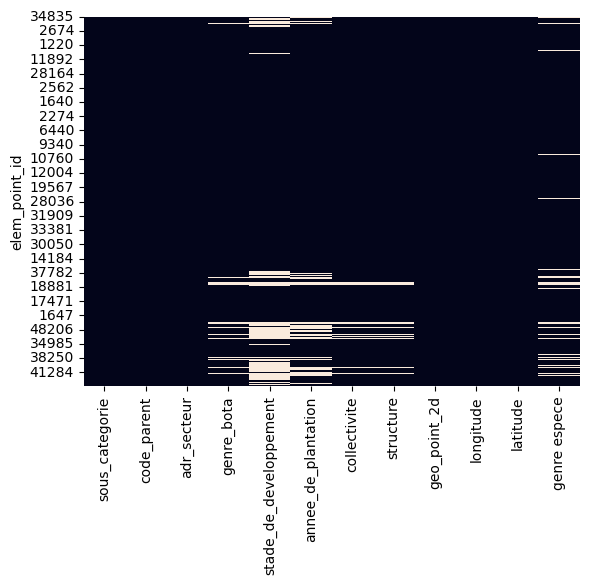

In [151]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [152]:
df.sample(5)

,sous_categorie,code_parent,adr_secteur,genre_bota,stade_de_developpement,annee_de_plantation,collectivite,structure,geo_point_2d,longitude,latitude,genre espece
elem_point_id,,,,,,,,,,,,
26148,ESP151,ESP9,1,Platanus,Arbre adulte,1976.0,Grenoble Alpes Métropole,Métropole de Grenoble,"45.19822171141432,5.711185885840658",45.198222,5.711186,Platanus acerifolia
41659,ESP174,ESP146,5,Fraxinus,Arbre jeune,2018.0,Ville de Grenoble,Ville de Grenoble,"45.18337702437097,5.735255700907446",45.183377,5.735256,Fraxinus angustifolia
19371,ESP174,ESP291,2,Platanus,Arbre adulte,1986.0,Ville de Grenoble,Ville de Grenoble,"45.181362866970794,5.717737554627433",45.181363,5.717738,Platanus acerifolia
21848,ESP151,ESP915,6,Betula,Arbre jeune,2001.0,Grenoble Alpes Métropole,Métropole de Grenoble,"45.16771855045288,5.725379003028724",45.167719,5.725379,Betula utilis
25125,ESP174,ESP1389,6,Acer,Arbre adulte,1975.0,Ville de Grenoble,Ville de Grenoble,"45.16269939885562,5.736986620018868",45.162699,5.736987,Acer pseudoplatanus


# Pickle

In [153]:
df.to_pickle(
    'data/arbres_grenoble_clean.pkl'
)